In [27]:
#Import necessary things

# Python 2 & 3 Compatibility
from __future__ import division

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV

%matplotlib inline

/Users/aeverett/Applications/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Now import my movies data!
movies = pd.read_csv('final_movies.csv')

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 54 columns):
Unnamed: 0           1058 non-null int64
Title                1058 non-null object
Year                 1058 non-null int64
tomatoMeter          642 non-null float64
tomatoRating         642 non-null float64
tomatoReviews        642 non-null float64
tomatoUserMeter      874 non-null float64
tomatoUserRating     874 non-null float64
tomatoUserReviews    921 non-null float64
Metascore            250 non-null float64
imdbRating           1041 non-null float64
imdbVotes            1041 non-null float64
imdbID               1058 non-null object
Awards               646 non-null object
Genre                1055 non-null object
Language             1040 non-null object
Country              1058 non-null object
Director             1055 non-null object
Rated                806 non-null object
Runtime              1026 non-null float64
Actors               1057 non-null object
Production  

In [14]:
remakes = movies[0:529].reset_index()
remakes = remakes.drop('index', axis = 1)
remakes = remakes.drop('Unnamed: 0', axis = 1)
print remakes.info()
remakes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 53 columns):
Title                529 non-null object
Year                 529 non-null int64
tomatoMeter          316 non-null float64
tomatoRating         316 non-null float64
tomatoReviews        316 non-null float64
tomatoUserMeter      426 non-null float64
tomatoUserRating     426 non-null float64
tomatoUserReviews    454 non-null float64
Metascore            190 non-null float64
imdbRating           524 non-null float64
imdbVotes            524 non-null float64
imdbID               529 non-null object
Awards               309 non-null object
Genre                529 non-null object
Language             525 non-null object
Country              529 non-null object
Director             528 non-null object
Rated                406 non-null object
Runtime              513 non-null float64
Actors               528 non-null object
Production           407 non-null object
Writer               525 

,Title,Year,tomatoMeter,tomatoRating,tomatoReviews,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,Metascore,imdbRating,...,Sci_Fi,Romance,Music,Fantasy,Western,War,Sport,History,Biography,PrimaryCountry
0,12,2007,76.0,6.8,58.0,83.0,3.5,47296.0,72.0,7.8,...,0,0,0,0,0,0,0,0,0,Russia
1,13,2010,8.0,3.8,13.0,34.0,2.9,5577.0,29.0,6.1,...,0,0,0,0,0,0,0,0,0,USA
2,13 Assassins,2010,96.0,8.0,120.0,89.0,4.1,23219.0,84.0,7.6,...,0,0,0,0,0,0,0,0,0,Japan
3,The 13th Letter,1951,83.0,7.0,6.0,NaN,NaN,116.0,NaN,6.6,...,0,0,0,0,0,0,0,0,0,USA
4,101 Dalmatians,1996,38.0,5.3,34.0,40.0,2.9,624911.0,49.0,5.6,...,0,0,0,0,0,0,0,0,0,USA


In [13]:
originals = movies[529:].reset_index()
originals = originals.drop('index', axis = 1)
originals = originals.drop('Unnamed: 0', axis = 1)
print originals.info()
originals.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 53 columns):
Title                529 non-null object
Year                 529 non-null int64
tomatoMeter          326 non-null float64
tomatoRating         326 non-null float64
tomatoReviews        326 non-null float64
tomatoUserMeter      448 non-null float64
tomatoUserRating     448 non-null float64
tomatoUserReviews    467 non-null float64
Metascore            60 non-null float64
imdbRating           517 non-null float64
imdbVotes            517 non-null float64
imdbID               529 non-null object
Awards               337 non-null object
Genre                526 non-null object
Language             515 non-null object
Country              529 non-null object
Director             527 non-null object
Rated                400 non-null object
Runtime              513 non-null float64
Actors               529 non-null object
Production           402 non-null object
Writer               525 n

,Title,Year,tomatoMeter,tomatoRating,tomatoReviews,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,Metascore,imdbRating,...,Sci_Fi,Romance,Music,Fantasy,Western,War,Sport,History,Biography,PrimaryCountry
0,12 Angry Men,1957,100.0,8.9,48.0,97.0,4.2,102915.0,NaN,8.9,...,0,0,0,0,0,0,0,0,0,USA
1,13 Tzameti,2005,84.0,7.0,67.0,85.0,3.9,9274.0,61.0,7.4,...,0,0,0,0,0,0,0,0,0,France
2,Jûsan-nin no shikaku,1963,NaN,NaN,NaN,69.0,3.7,161.0,NaN,7.6,...,0,0,0,0,0,0,0,0,0,Japan
3,Le Corbeau: The Raven,1943,87.0,7.7,23.0,91.0,4.0,2750.0,NaN,7.7,...,0,0,0,0,0,0,0,0,0,France
4,101 Dalmatians,1961,98.0,8.1,45.0,75.0,3.3,708348.0,NaN,7.2,...,0,0,0,0,0,0,0,0,0,USA


In [17]:
movie_pairs = originals.merge(remakes, left_index=True, right_index=True, suffixes=['_orig', '_remake'])

In [18]:
pd.set_option('display.max_columns', 999)

In [63]:
#Create some new variables I could only create once the movie pairs are merged, based on the relationship between them

#1. Indicator for whether the remake and original are in the same language
movie_pairs['SameLang'] = (movie_pairs['PrimaryLangFixed_orig'] == movie_pairs['PrimaryLangFixed_remake']).astype(int)

In [64]:
#2. Indicator for whether the remake and original are from the same country
movie_pairs['SameCountry'] = (movie_pairs['PrimaryCountry_orig'] == movie_pairs['PrimaryCountry_remake']).astype(int)

In [71]:
#3. Number of years between the remake and the original
movie_pairs['YearDiff'] = (movie_pairs['Year_remake'] - movie_pairs['Year_orig'])

In [73]:
movie_pairs.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 109 columns):
Title_orig                  object
Year_orig                   int64
tomatoMeter_orig            float64
tomatoRating_orig           float64
tomatoReviews_orig          float64
tomatoUserMeter_orig        float64
tomatoUserRating_orig       float64
tomatoUserReviews_orig      float64
Metascore_orig              float64
imdbRating_orig             float64
imdbVotes_orig              float64
imdbID_orig                 object
Awards_orig                 object
Genre_orig                  object
Language_orig               object
Country_orig                object
Director_orig               object
Rated_orig                  object
Runtime_orig                float64
Actors_orig                 object
Production_orig             object
Writer_orig                 object
budget_usd_fixed_orig       float64
gross_usd_fixed_orig        float64
wkend_usd_fixed_orig        float64
gross_i

In [74]:
# Which variables am I interested in?
analysis_pairs = movie_pairs[['Title_orig', 'Year_orig', 'tomatoMeter_orig', 'tomatoRating_orig', 'tomatoReviews_orig', 'tomatoUserMeter_orig', 'tomatoUserRating_orig', 'tomatoUserReviews_orig', 'Metascore_orig', 'imdbRating_orig', 'imdbVotes_orig', 'Award_count_orig', 'Noms_count_orig', 'Noms+Awards_orig', 'Title_remake', 'Year_remake', 'tomatoMeter_remake', 'tomatoRating_remake', 'tomatoReviews_remake', 'tomatoUserMeter_remake', 'tomatoUserRating_remake', 'tomatoUserReviews_remake', 'Metascore_remake', 'imdbRating_remake', 'imdbVotes_remake', 'Runtime_remake', 'budget_usd_fixed_remake', 'gross_usd_fixed_remake', 'wkend_usd_fixed_remake', 'Award_count_remake', 'Noms_count_remake', 'Noms+Awards_remake', 'PrimaryLangFixed_remake', 'Crime_remake', 'Drama_remake', 'Thriller_remake', 'Action_remake', 'Adventure_remake', 'Film_Noir_remake', 'Mystery_remake', 'Comedy_remake', 'Family_remake', 'Horror_remake', 'Sci_Fi_remake', 'Romance_remake', 'Music_remake', 'Fantasy_remake', 'Western_remake', 'War_remake', 'Sport_remake', 'History_remake', 'Biography_remake', 'PrimaryCountry_remake', 'SameLang', 'SameCountry', 'YearDiff']]

In [75]:
analysis_pairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 56 columns):
Title_orig                  529 non-null object
Year_orig                   529 non-null int64
tomatoMeter_orig            326 non-null float64
tomatoRating_orig           326 non-null float64
tomatoReviews_orig          326 non-null float64
tomatoUserMeter_orig        448 non-null float64
tomatoUserRating_orig       448 non-null float64
tomatoUserReviews_orig      467 non-null float64
Metascore_orig              60 non-null float64
imdbRating_orig             517 non-null float64
imdbVotes_orig              517 non-null float64
Award_count_orig            529 non-null int64
Noms_count_orig             529 non-null int64
Noms+Awards_orig            529 non-null int64
Title_remake                529 non-null object
Year_remake                 529 non-null int64
tomatoMeter_remake          316 non-null float64
tomatoRating_remake         316 non-null float64
tomatoReviews_remake      

In [76]:
analysis_pairs.head()

,Title_orig,Year_orig,tomatoMeter_orig,tomatoRating_orig,tomatoReviews_orig,tomatoUserMeter_orig,tomatoUserRating_orig,tomatoUserReviews_orig,Metascore_orig,imdbRating_orig,imdbVotes_orig,Award_count_orig,Noms_count_orig,Noms+Awards_orig,Title_remake,Year_remake,tomatoMeter_remake,tomatoRating_remake,tomatoReviews_remake,tomatoUserMeter_remake,tomatoUserRating_remake,tomatoUserReviews_remake,Metascore_remake,imdbRating_remake,imdbVotes_remake,Runtime_remake,budget_usd_fixed_remake,gross_usd_fixed_remake,wkend_usd_fixed_remake,Award_count_remake,Noms_count_remake,Noms+Awards_remake,PrimaryLangFixed_remake,Crime_remake,Drama_remake,Thriller_remake,Action_remake,Adventure_remake,Film_Noir_remake,Mystery_remake,Comedy_remake,Family_remake,Horror_remake,Sci_Fi_remake,Romance_remake,Music_remake,Fantasy_remake,Western_remake,War_remake,Sport_remake,History_remake,Biography_remake,PrimaryCountry_remake,SameLang,SameCountry,YearDiff
0,12 Angry Men,1957,100.0,8.9,48.0,97.0,4.2,102915.0,NaN,8.9,451535.0,16,11,27,12,2007,76.0,6.8,58.0,83.0,3.5,47296.0,72.0,7.8,11690.0,159.0,4000000.0,125024.0,12042.0,5,6,11,Russian,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Russia,0,0,50
1,13 Tzameti,2005,84.0,7.0,67.0,85.0,3.9,9274.0,61.0,7.4,14851.0,10,3,13,13,2010,8.0,3.8,13.0,34.0,2.9,5577.0,29.0,6.1,34494.0,91.0,NaN,NaN,NaN,1,0,1,English,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,USA,0,0,5
2,Jûsan-nin no shikaku,1963,NaN,NaN,NaN,69.0,3.7,161.0,NaN,7.6,528.0,0,0,0,13 Assassins,2010,96.0,8.0,120.0,89.0,4.1,23219.0,84.0,7.6,50800.0,141.0,6000000.0,802524.0,45854.0,14,27,41,Japanese,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Japan,1,1,47
3,Le Corbeau: The Raven,1943,87.0,7.7,23.0,91.0,4.0,2750.0,NaN,7.7,6322.0,0,0,0,The 13th Letter,1951,83.0,7.0,6.0,NaN,NaN,116.0,NaN,6.6,209.0,85.0,NaN,NaN,NaN,0,0,0,English,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,USA,0,0,8
4,101 Dalmatians,1961,98.0,8.1,45.0,75.0,3.3,708348.0,NaN,7.2,113494.0,1,2,3,101 Dalmatians,1996,38.0,5.3,34.0,40.0,2.9,624911.0,49.0,5.6,74624.0,103.0,75000000.0,136182161.0,45073479.0,3,10,13,English,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,USA,1,1,35


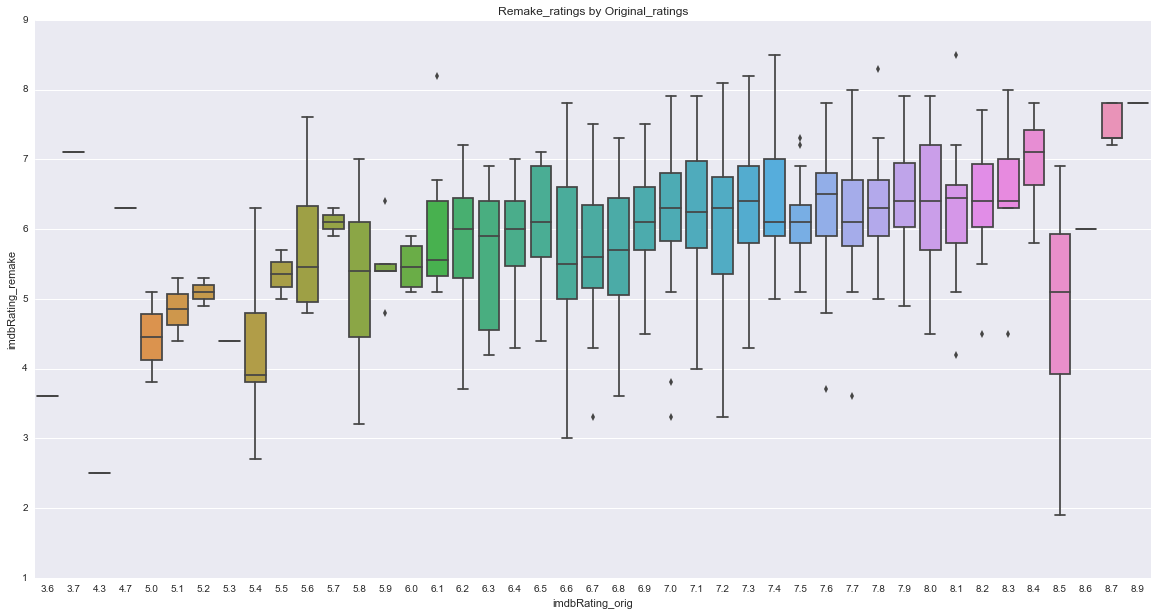

In [79]:
#Here I want to check for some nonlinearities in the relationship between how well the remake is liked and how well the original is liked
# Remake_ratings by Original_ratings
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Remake_ratings by Original_ratings')
# Create a seaborn boxplot of counts by month ordered by increasing month
sns.boxplot(x=analysis_pairs['imdbRating_orig'].sort_values(), y=analysis_pairs['imdbRating_remake'])
ax.set_xlabel('imdbRating_orig')
ax.set_ylabel('imdbRating_remake')

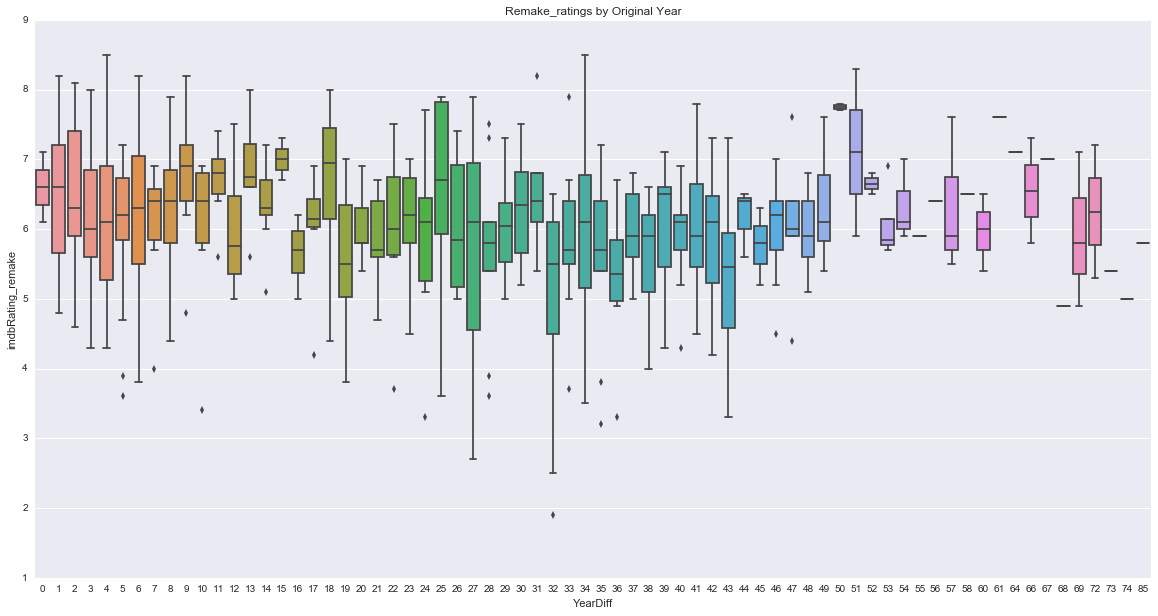

In [232]:
#Here I want to check for some nonlinearities in the relationship between how well the remake is liked and awards of original 
# Remake_ratings by YearDiff
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Remake_ratings by YearDiff')
# Create a seaborn boxplot of counts by month ordered by increasing month
sns.boxplot(x=analysis_pairs['YearDiff'].sort_values(), y=analysis_pairs['imdbRating_remake'])
ax.set_xlabel('YearDiff')
ax.set_ylabel('imdbRating_remake')

In [82]:
# Looks worth making the following:

analysis_pairs['imdbRating_orig^2'] = analysis_pairs['imdbRating_orig']*analysis_pairs['imdbRating_orig']
analysis_pairs['imdbRating_orig^3'] = analysis_pairs['imdbRating_orig']*analysis_pairs['imdbRating_orig']*analysis_pairs['imdbRating_orig']

#Maybe also year_orig squared and yearDiff squared

/Users/aeverett/Applications/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/aeverett/Applications/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [202]:
#Now create the data matrix for the analysis of first dependent variable (y ='imdbRating_remake')
#Includes dropping missing data
Data1 = analysis_pairs[['imdbRating_remake', 'imdbRating_orig', 'imdbRating_orig^2', 'imdbRating_orig^3', 'Year_orig', 'Award_count_orig', 'Noms_count_orig', 'Noms+Awards_orig', 'Runtime_remake', 'Award_count_remake', 'Noms_count_remake', 'Noms+Awards_remake', 'Crime_remake', 'Drama_remake', 'Thriller_remake', 'Action_remake', 'Adventure_remake', 'Film_Noir_remake', 'Mystery_remake', 'Comedy_remake', 'Family_remake', 'Horror_remake', 'Sci_Fi_remake', 'Romance_remake', 'Music_remake', 'Fantasy_remake', 'Western_remake', 'War_remake', 'Sport_remake', 'History_remake', 'Biography_remake', 'SameLang', 'SameCountry', 'YearDiff']].dropna(how='any')

In [203]:
print Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 528
Data columns (total 34 columns):
imdbRating_remake     499 non-null float64
imdbRating_orig       499 non-null float64
imdbRating_orig^2     499 non-null float64
imdbRating_orig^3     499 non-null float64
Year_orig             499 non-null int64
Award_count_orig      499 non-null int64
Noms_count_orig       499 non-null int64
Noms+Awards_orig      499 non-null int64
Runtime_remake        499 non-null float64
Award_count_remake    499 non-null int64
Noms_count_remake     499 non-null int64
Noms+Awards_remake    499 non-null int64
Crime_remake          499 non-null int64
Drama_remake          499 non-null int64
Thriller_remake       499 non-null int64
Action_remake         499 non-null int64
Adventure_remake      499 non-null int64
Film_Noir_remake      499 non-null int64
Mystery_remake        499 non-null int64
Comedy_remake         499 non-null int64
Family_remake         499 non-null int64
Horror_remake         49

In [205]:
#First try a regression with all this stuff in X1 using sm
y = Data1.iloc[:, 0]
X1 = Data1.iloc[:, 1:]
model = sm.OLS(y, sm.add_constant(X1))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      imdbRating_remake   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     9.293
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           1.87e-32
Time:                        17:02:46   Log-Likelihood:                -583.60
No. Observations:                 499   AIC:                             1231.
Df Residuals:                     467   BIC:                             1366.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                 29.5302      7.529      3.922      0.000        14.735    44.325
imdbRating_orig        1.3654      3.053      0.447      0.655        -4.634     7.365
imdbRating_orig^2     -0.1267      0.478     -0.265      0.791        -1.066     0.813
imdbRating_orig^3      0.0046      0.025      0.189      0.850        -0.044     0.053
Year_orig             -0.0147      0.002     -6.907      0.000        -0.019    -0.011
Award_count_orig       0.0141      0.009      1.546      0.123        -0.004     0.032
Noms_count_orig       -0.0169      0.010     -1.657      0.098        -0.037     0.003
Noms+Awards_orig      -0.0028      0.002     -1.190      0.235        -0.007     0.002
Runtime_remake         0.0073      0.002      4.301      0.000         0.004     0.011
Award_count_remake    -0.0419      0.013     -3.323      0.001        -0.067    -0.017
Noms_count_remake      0.0463      0.011      4.335      0.000         0.025     0.067
Noms+Awards_remake     0.0044      0.003      1.580      0.115        -0.001     0.010
Crime_remake           0.2834      0.108      2.635      0.009         0.072     0.495
Drama_remake           0.1985      0.093      2.135      0.033         0.016     0.381
Thriller_remake        0.0715      0.107      0.667      0.505        -0.139     0.282
Action_remake         -0.1484      0.118     -1.255      0.210        -0.381     0.084
Adventure_remake      -0.1565      0.139     -1.123      0.262        -0.430     0.117
Film_Noir_remake      -0.1607      0.324     -0.496      0.620        -0.797     0.476
Mystery_remake        -0.2096      0.126     -1.663      0.097        -0.457     0.038
Comedy_remake          0.0556      0.106      0.524      0.600        -0.153     0.264
Family_remake         -0.0219      0.198     -0.111      0.912        -0.411     0.367
Horror_remake         -0.0624      0.119     -0.526      0.599        -0.295     0.171
Sci_Fi_remake         -0.1211      0.134     -0.905      0.366        -0.384     0.142
Romance_remake         0.0810      0.101      0.802      0.423        -0.118     0.280
Music_remake          -0.1987      0.159     -1.251      0.212        -0.511     0.114
Fantasy_remake        -0.0021      0.153     -0.013      0.989        -0.302     0.298
Western_remake        -0.0094      0.240     -0.039      0.969        -0.481     0.462
War_remake             0.4853      0.282      1.718      0.086        -0.070     1.040
Sport_remake          -0.1412      0.278     -0.508      0.612        -0.688     0.406
History_remake         0.1694      0.816      0.208      0.836        -1.434     1.773
Biography_remake       0.7007      0.590      1.188      0.236        -0.459     1.860
SameLang              -0.0931      0.132     -0.708      0.480        -0.352     0.165
SameCountry            0.1313      0.1

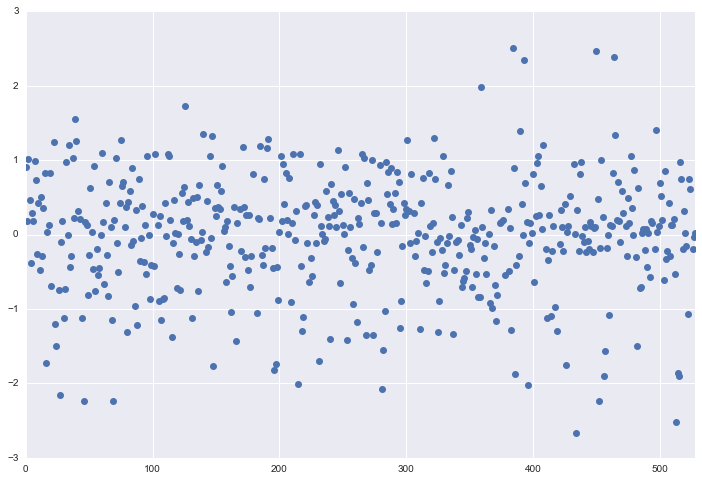

In [206]:
# Now plot the residuals -- we want them to be distributed randomly around 0 (smaller, closer to 0 indicates better model)
fit.resid.plot(style='o', figsize=(12,8))

In [207]:
#Now do same using sklearn
lr = LinearRegression()
# Begin by fitting the model to all the data
lr.fit(X1, y)
# Print out the R^2 for the model against the full dataset
lr.score(X1,y)

0.38151844382183631

In [211]:
#Now I think I would like to do a lasso -- to get a first sense of which of these it wants to drop.

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

lasso = Lasso(alpha=.03)
lasso.fit(X1, y)
print(lasso.coef_)
print(lasso.score(X1, y))

#Can also see the intercept if I want, using lasso.intercept_

[ 0.          0.05683123 -0.00316533 -0.01471419  0.00914505 -0.01595331
  0.          0.00770192 -0.02124928  0.03967109  0.          0.04412572
  0.11706498  0.         -0.         -0.          0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.          0.         -0.          0.
 -0.02055772]
0.342339641767


In [212]:
pd.DataFrame(zip(X1.columns, lasso.coef_))
#Could also sort these to see which variables matter most from top to bottom:
# pd.DataFrame(zip(X1.columns, lasso.coef_)).sort_values(1, ascending=False)

,0,1
0,imdbRating_orig,0.000000
1,imdbRating_orig^2,0.056831
2,imdbRating_orig^3,-0.003165
3,Year_orig,-0.014714
4,Award_count_orig,0.009145
5,Noms_count_orig,-0.015953
6,Noms+Awards_orig,0.000000
7,Runtime_remake,0.007702
8,Award_count_remake,-0.021249
9,Noms_count_remake,0.039671


In [215]:
# Now let's try a second model, without the polynomial terms.  Here, drop them and get a new X matrix, X2
X2 = X1.drop('imdbRating_orig^3', axis = 1)
X2 = X2.drop('imdbRating_orig^2', axis = 1)
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 528
Data columns (total 31 columns):
imdbRating_orig       499 non-null float64
Year_orig             499 non-null int64
Award_count_orig      499 non-null int64
Noms_count_orig       499 non-null int64
Noms+Awards_orig      499 non-null int64
Runtime_remake        499 non-null float64
Award_count_remake    499 non-null int64
Noms_count_remake     499 non-null int64
Noms+Awards_remake    499 non-null int64
Crime_remake          499 non-null int64
Drama_remake          499 non-null int64
Thriller_remake       499 non-null int64
Action_remake         499 non-null int64
Adventure_remake      499 non-null int64
Film_Noir_remake      499 non-null int64
Mystery_remake        499 non-null int64
Comedy_remake         499 non-null int64
Family_remake         499 non-null int64
Horror_remake         499 non-null int64
Sci_Fi_remake         499 non-null int64
Romance_remake        499 non-null int64
Music_remake          499 non-

In [222]:
#First Run the new model using sm (statsmodels)
model = sm.OLS(y, sm.add_constant(X2))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      imdbRating_remake   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     9.923
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           2.86e-33
Time:                        17:29:55   Log-Likelihood:                -584.10
No. Observations:                 499   AIC:                             1228.
Df Residuals:                     469   BIC:                             1355.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                 31.9467      4.251      7.516      0.000        23.594    40.299
imdbRating_orig        0.3023      0.055      5.543      0.000         0.195     0.409
Year_orig             -0.0145      0.002     -6.851      0.000        -0.019    -0.010
Award_count_orig       0.0140      0.009      1.534      0.126        -0.004     0.032
Noms_count_orig       -0.0170      0.010     -1.672      0.095        -0.037     0.003
Noms+Awards_orig      -0.0030      0.002     -1.309      0.191        -0.008     0.002
Runtime_remake         0.0072      0.002      4.268      0.000         0.004     0.010
Award_count_remake    -0.0420      0.013     -3.337      0.001        -0.067    -0.017
Noms_count_remake      0.0463      0.011      4.349      0.000         0.025     0.067
Noms+Awards_remake     0.0043      0.003      1.568      0.117        -0.001     0.010
Crime_remake           0.2868      0.107      2.673      0.008         0.076     0.498
Drama_remake           0.1887      0.092      2.046      0.041         0.008     0.370
Thriller_remake        0.0681      0.107      0.638      0.524        -0.142     0.278
Action_remake         -0.1542      0.118     -1.307      0.192        -0.386     0.078
Adventure_remake      -0.1537      0.139     -1.106      0.269        -0.427     0.119
Film_Noir_remake      -0.1636      0.323     -0.506      0.613        -0.799     0.472
Mystery_remake        -0.2142      0.125     -1.709      0.088        -0.460     0.032
Comedy_remake          0.0498      0.106      0.471      0.638        -0.158     0.257
Family_remake         -0.0048      0.197     -0.024      0.980        -0.392     0.382
Horror_remake         -0.0660      0.118     -0.559      0.577        -0.298     0.166
Sci_Fi_remake         -0.1264      0.134     -0.947      0.344        -0.389     0.136
Romance_remake         0.0896      0.100      0.892      0.373        -0.108     0.287
Music_remake          -0.1925      0.159     -1.214      0.225        -0.504     0.119
Fantasy_remake        -0.0105      0.152     -0.069      0.945        -0.310     0.289
Western_remake        -0.0285      0.236     -0.121      0.904        -0.492     0.435
War_remake             0.4810      0.282      1.705      0.089        -0.073     1.035
Sport_remake          -0.1294      0.278     -0.466      0.642        -0.675     0.416
History_remake         0.2030      0.814      0.249      0.803        -1.397     1.804
Biography_remake       0.7242      0.588      1.231      0.219        -0.432     1.880
SameLang              -0.0796      0.130     -0.610      0.542        -0.336     0.177
SameCountry            0.1228      0.107      1.144      0.253        -0.088     0.334
YearDiff              -0.0205      0.003     -7.498      0.000        -0.026    -0.015
======================================

In [221]:
#Run the new model using sklearn
lr = LinearRegression()
# Begin by fitting the model to all the data
lr.fit(X2, y)
# Print out the R^2 for the model against the full dataset
lr.score(X2,y)

0.38026851635316239

In [217]:
#Now do a lasso again

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
  
lasso = Lasso(alpha=.03)
lasso.fit(X2, y)
print(lasso.coef_)
print(lasso.score(X2, y))

#Can also see the intercept if I want, using lasso.intercept_

[ 0.27594536 -0.01511794  0.01010858 -0.01550309 -0.          0.00790098
 -0.0217551   0.04016159  0.          0.05940131  0.12395919  0.         -0.
 -0.          0.         -0.          0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.          0.         -0.          0.
  0.         -0.          0.         -0.02048733]
0.341548875658


In [219]:
#Again look at which ones are good
pd.DataFrame(zip(X2.columns, lasso.coef_))

,0,1
0,imdbRating_orig,0.275945
1,Year_orig,-0.015118
2,Award_count_orig,0.010109
3,Noms_count_orig,-0.015503
4,Noms+Awards_orig,-0.000000
5,Runtime_remake,0.007901
6,Award_count_remake,-0.021755
7,Noms_count_remake,0.040162
8,Noms+Awards_remake,0.000000
9,Crime_remake,0.059401


In [223]:
#Okay, so we've clearly eliminated the polynomial terms from the good model.  
# I think the next most sensible thing to drop is the information about the awards & nominations of the remake.
# After all, this is probably unfair since you don't know if you'll get awards in advance.  Could actually make that a DV.
#So now drop those.
X3 = X2.drop('Award_count_remake', axis = 1)
X3 = X3.drop('Noms_count_remake', axis = 1)
X3 = X3.drop('Noms+Awards_remake', axis = 1)
X3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 528
Data columns (total 28 columns):
imdbRating_orig     499 non-null float64
Year_orig           499 non-null int64
Award_count_orig    499 non-null int64
Noms_count_orig     499 non-null int64
Noms+Awards_orig    499 non-null int64
Runtime_remake      499 non-null float64
Crime_remake        499 non-null int64
Drama_remake        499 non-null int64
Thriller_remake     499 non-null int64
Action_remake       499 non-null int64
Adventure_remake    499 non-null int64
Film_Noir_remake    499 non-null int64
Mystery_remake      499 non-null int64
Comedy_remake       499 non-null int64
Family_remake       499 non-null int64
Horror_remake       499 non-null int64
Sci_Fi_remake       499 non-null int64
Romance_remake      499 non-null int64
Music_remake        499 non-null int64
Fantasy_remake      499 non-null int64
Western_remake      499 non-null int64
War_remake          499 non-null int64
Sport_remake        499 non-null 

In [225]:
#First Run this Model 3 using sm (statsmodels)
model = sm.OLS(y, sm.add_constant(X3))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      imdbRating_remake   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     7.966
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           7.18e-25
Time:                        17:38:59   Log-Likelihood:                -609.64
No. Observations:                 499   AIC:                             1275.
Df Residuals:                     471   BIC:                             1393.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const               28.4586      4.416      6.444      0.000        19.781    37.136
imdbRating_orig      0.3289      0.057      5.757      0.000         0.217     0.441
Year_orig           -0.0129      0.002     -5.879      0.000        -0.017    -0.009
Award_count_orig     0.0121      0.010      1.261      0.208        -0.007     0.031
Noms_count_orig     -0.0138      0.011     -1.293      0.197        -0.035     0.007
Noms+Awards_orig    -0.0017      0.002     -0.717      0.474        -0.006     0.003
Runtime_remake       0.0097      0.002      5.618      0.000         0.006     0.013
Crime_remake         0.3011      0.112      2.678      0.008         0.080     0.522
Drama_remake         0.1870      0.097      1.934      0.054        -0.003     0.377
Thriller_remake      0.1122      0.112      1.004      0.316        -0.107     0.332
Action_remake       -0.1780      0.124     -1.437      0.151        -0.421     0.065
Adventure_remake     0.0154      0.144      0.107      0.915        -0.267     0.297
Film_Noir_remake    -0.1619      0.340     -0.477      0.634        -0.829     0.506
Mystery_remake      -0.2088      0.131     -1.588      0.113        -0.467     0.049
Comedy_remake        0.0645      0.111      0.581      0.562        -0.154     0.282
Family_remake        0.0010      0.207      0.005      0.996        -0.405     0.407
Horror_remake       -0.0344      0.124     -0.277      0.782        -0.278     0.209
Sci_Fi_remake       -0.0794      0.140     -0.567      0.571        -0.355     0.196
Romance_remake       0.0942      0.105      0.893      0.372        -0.113     0.301
Music_remake        -0.1674      0.167     -1.005      0.315        -0.495     0.160
Fantasy_remake       0.0273      0.160      0.171      0.864        -0.287     0.341
Western_remake      -0.0670      0.248     -0.270      0.787        -0.554     0.420
War_remake           0.4502      0.296      1.520      0.129        -0.132     1.032
Sport_remake        -0.0832      0.291     -0.285      0.775        -0.656     0.490
History_remake       0.2225      0.855      0.260      0.795        -1.458     1.903
Biography_remake     0.5137      0.617      0.833      0.405        -0.698     1.726
SameLang            -0.0336      0.137     -0.245      0.806        -0.302     0.235
SameCountry          0.0602      0.112      0.537      0.592        -0.160     0.281
YearDiff            -0.0183      0.003     -6.419      0.000        -0.024    -0.013
==============================================================================
Omnibus:                       19.637   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.899
Skew:                          -0.392   Prob(JB):                     6.46e-06
Kurtosis:                       3.731   Cond. N

In [224]:
#Run the new model using sklearn
lr = LinearRegression()
# Begin by fitting the model to all the data
lr.fit(X3, y)
# Print out the R^2 for the model against the full dataset
lr.score(X3,y)

0.31348483771622815

In [226]:
#Now do a lasso again for Model 3

from sklearn.linear_model import Lasso
  
lasso = Lasso(alpha=.03)
lasso.fit(X3, y)
print(lasso.coef_)
print(lasso.score(X3, y))

#Can also see the intercept if I want, using lasso.intercept_

[ 0.29275371 -0.01374612  0.00977589 -0.01086624 -0.          0.01023147
  0.06141053  0.10405653  0.         -0.         -0.          0.         -0.
  0.         -0.         -0.         -0.          0.         -0.         -0.
 -0.          0.         -0.          0.          0.         -0.         -0.
 -0.01792747]
0.281023582782


In [227]:
#Again look at which ones are good
pd.DataFrame(zip(X3.columns, lasso.coef_))

,0,1
0,imdbRating_orig,0.292754
1,Year_orig,-0.013746
2,Award_count_orig,0.009776
3,Noms_count_orig,-0.010866
4,Noms+Awards_orig,-0.000000
5,Runtime_remake,0.010231
6,Crime_remake,0.061411
7,Drama_remake,0.104057
8,Thriller_remake,0.000000
9,Action_remake,-0.000000


In [233]:
#Okay, so that didn't seem to have an effect on the other variables.
# Now I want to drop nominations plus awards, since it might be depressing the independent effects of the others
X4 = X2.drop('Noms+Awards_orig', axis = 1)
X4 = X4.drop('Noms+Awards_remake', axis = 1)
X4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 528
Data columns (total 29 columns):
imdbRating_orig       499 non-null float64
Year_orig             499 non-null int64
Award_count_orig      499 non-null int64
Noms_count_orig       499 non-null int64
Runtime_remake        499 non-null float64
Award_count_remake    499 non-null int64
Noms_count_remake     499 non-null int64
Crime_remake          499 non-null int64
Drama_remake          499 non-null int64
Thriller_remake       499 non-null int64
Action_remake         499 non-null int64
Adventure_remake      499 non-null int64
Film_Noir_remake      499 non-null int64
Mystery_remake        499 non-null int64
Comedy_remake         499 non-null int64
Family_remake         499 non-null int64
Horror_remake         499 non-null int64
Sci_Fi_remake         499 non-null int64
Romance_remake        499 non-null int64
Music_remake          499 non-null int64
Fantasy_remake        499 non-null int64
Western_remake        499 non-

In [234]:
#First Run this Model 4 using sm (statsmodels)
model = sm.OLS(y, sm.add_constant(X4))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      imdbRating_remake   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     9.923
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           2.86e-33
Time:                        20:38:35   Log-Likelihood:                -584.10
No. Observations:                 499   AIC:                             1228.
Df Residuals:                     469   BIC:                             1355.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                 31.9467      4.251      7.516      0.000        23.594    40.299
imdbRating_orig        0.3023      0.055      5.543      0.000         0.195     0.409
Year_orig             -0.0145      0.002     -6.851      0.000        -0.019    -0.010
Award_count_orig       0.0110      0.009      1.280      0.201        -0.006     0.028
Noms_count_orig       -0.0201      0.012     -1.727      0.085        -0.043     0.003
Runtime_remake         0.0072      0.002      4.268      0.000         0.004     0.010
Award_count_remake    -0.0377      0.015     -2.549      0.011        -0.067    -0.009
Noms_count_remake      0.0507      0.009      5.536      0.000         0.033     0.069
Crime_remake           0.2868      0.107      2.673      0.008         0.076     0.498
Drama_remake           0.1887      0.092      2.046      0.041         0.008     0.370
Thriller_remake        0.0681      0.107      0.638      0.524        -0.142     0.278
Action_remake         -0.1542      0.118     -1.307      0.192        -0.386     0.078
Adventure_remake      -0.1537      0.139     -1.106      0.269        -0.427     0.119
Film_Noir_remake      -0.1636      0.323     -0.506      0.613        -0.799     0.472
Mystery_remake        -0.2142      0.125     -1.709      0.088        -0.460     0.032
Comedy_remake          0.0498      0.106      0.471      0.638        -0.158     0.257
Family_remake         -0.0048      0.197     -0.024      0.980        -0.392     0.382
Horror_remake         -0.0660      0.118     -0.559      0.577        -0.298     0.166
Sci_Fi_remake         -0.1264      0.134     -0.947      0.344        -0.389     0.136
Romance_remake         0.0896      0.100      0.892      0.373        -0.108     0.287
Music_remake          -0.1925      0.159     -1.214      0.225        -0.504     0.119
Fantasy_remake        -0.0105      0.152     -0.069      0.945        -0.310     0.289
Western_remake        -0.0285      0.236     -0.121      0.904        -0.492     0.435
War_remake             0.4810      0.282      1.705      0.089        -0.073     1.035
Sport_remake          -0.1294      0.278     -0.466      0.642        -0.675     0.416
History_remake         0.2030      0.814      0.249      0.803        -1.397     1.804
Biography_remake       0.7242      0.588      1.231      0.219        -0.432     1.880
SameLang              -0.0796      0.130     -0.610      0.542        -0.336     0.177
SameCountry            0.1228      0.107      1.144      0.253        -0.088     0.334
YearDiff              -0.0205      0.003     -7.498      0.000        -0.026    -0.015
==============================================================================
Omnibus:                       23.474   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (J

In [235]:
#Run with sklearn
lr = LinearRegression()
# Begin by fitting the model to all the data
lr.fit(X4, y)
# Print out the R^2 for the model against the full dataset
lr.score(X4,y)

0.38026851635316206

In [236]:
#Lasso for Model 4

from sklearn.linear_model import Lasso
  
lasso = Lasso(alpha=.03)
lasso.fit(X4, y)
print(lasso.coef_)
print(lasso.score(X4, y))

#Can also see the intercept if I want, using lasso.intercept_

[ 0.27596601 -0.01511596  0.01010347 -0.01550058  0.00790167 -0.0216386
  0.04009922  0.0593456   0.12390789  0.         -0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.         -0.
 -0.         -0.          0.         -0.          0.          0.         -0.
  0.         -0.02048531]
0.341532049911


In [237]:
#Again look at which ones are good
pd.DataFrame(zip(X4.columns, lasso.coef_))

,0,1
0,imdbRating_orig,0.275966
1,Year_orig,-0.015116
2,Award_count_orig,0.010103
3,Noms_count_orig,-0.015501
4,Runtime_remake,0.007902
5,Award_count_remake,-0.021639
6,Noms_count_remake,0.040099
7,Crime_remake,0.059346
8,Drama_remake,0.123908
9,Thriller_remake,0.000000


In [246]:
#Okay, so clearly makes sense to drop Noms+Awards.
#Now let's drop SameCountry and see if that affects language, & vice versa
#After checking both individually it looks like neither matters, so let's drop both
X5 = X4.drop('SameLang', axis = 1)
X5 = X5.drop('SameCountry', axis = 1)
X5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 528
Data columns (total 27 columns):
imdbRating_orig       499 non-null float64
Year_orig             499 non-null int64
Award_count_orig      499 non-null int64
Noms_count_orig       499 non-null int64
Runtime_remake        499 non-null float64
Award_count_remake    499 non-null int64
Noms_count_remake     499 non-null int64
Crime_remake          499 non-null int64
Drama_remake          499 non-null int64
Thriller_remake       499 non-null int64
Action_remake         499 non-null int64
Adventure_remake      499 non-null int64
Film_Noir_remake      499 non-null int64
Mystery_remake        499 non-null int64
Comedy_remake         499 non-null int64
Family_remake         499 non-null int64
Horror_remake         499 non-null int64
Sci_Fi_remake         499 non-null int64
Romance_remake        499 non-null int64
Music_remake          499 non-null int64
Fantasy_remake        499 non-null int64
Western_remake        499 non-

In [247]:
#Model 5 using sm (statsmodels)
model = sm.OLS(y, sm.add_constant(X5))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      imdbRating_remake   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     10.63
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           4.85e-34
Time:                        20:56:30   Log-Likelihood:                -584.80
No. Observations:                 499   AIC:                             1226.
Df Residuals:                     471   BIC:                             1344.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                 32.1763      3.947      8.152      0.000        24.420    39.932
imdbRating_orig        0.3048      0.053      5.719      0.000         0.200     0.409
Year_orig             -0.0146      0.002     -7.371      0.000        -0.019    -0.011
Award_count_orig       0.0108      0.008      1.280      0.201        -0.006     0.027
Noms_count_orig       -0.0201      0.011     -1.765      0.078        -0.042     0.002
Runtime_remake         0.0074      0.002      4.423      0.000         0.004     0.011
Award_count_remake    -0.0382      0.015     -2.593      0.010        -0.067    -0.009
Noms_count_remake      0.0504      0.009      5.521      0.000         0.032     0.068
Crime_remake           0.2880      0.107      2.686      0.007         0.077     0.499
Drama_remake           0.1918      0.091      2.097      0.037         0.012     0.371
Thriller_remake        0.0618      0.106      0.581      0.562        -0.147     0.271
Action_remake         -0.1545      0.118     -1.310      0.191        -0.386     0.077
Adventure_remake      -0.1625      0.139     -1.172      0.242        -0.435     0.110
Film_Noir_remake      -0.1644      0.323     -0.509      0.611        -0.799     0.470
Mystery_remake        -0.2209      0.125     -1.774      0.077        -0.466     0.024
Comedy_remake          0.0506      0.105      0.482      0.630        -0.156     0.257
Family_remake          0.0166      0.196      0.085      0.933        -0.368     0.401
Horror_remake         -0.0595      0.118     -0.505      0.613        -0.291     0.172
Sci_Fi_remake         -0.1229      0.133     -0.921      0.357        -0.385     0.139
Romance_remake         0.0902      0.100      0.906      0.365        -0.105     0.286
Music_remake          -0.1829      0.158     -1.158      0.248        -0.493     0.128
Fantasy_remake        -0.0259      0.152     -0.171      0.864        -0.324     0.272
Western_remake        -0.0221      0.236     -0.094      0.925        -0.486     0.441
War_remake             0.4475      0.280      1.598      0.111        -0.103     0.998
Sport_remake          -0.1267      0.277     -0.458      0.647        -0.670     0.417
History_remake         0.2170      0.814      0.267      0.790        -1.382     1.816
Biography_remake       0.7340      0.588      1.249      0.212        -0.421     1.889
YearDiff              -0.0204      0.003     -7.944      0.000        -0.025    -0.015
==============================================================================
Omnibus:                       25.356   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.446
Skew:                          -0.432   Prob(JB):                     3.31e-08
Kurtosis:                       3.955   Cond. No.                     

In [248]:
#Run with sklearn
lr = LinearRegression()
# Begin by fitting the model to all the data
lr.fit(X5, y)
# Print out the R^2 for the model against the full dataset
lr.score(X5,y)

0.37852625733780998

In [249]:
#Lasso for Model 5

from sklearn.linear_model import Lasso
  
lasso = Lasso(alpha=.03)
lasso.fit(X5, y)
print(lasso.coef_)
print(lasso.score(X5, y))

#Can also see the intercept if I want, using lasso.intercept_

[ 0.27596601 -0.01511596  0.01010347 -0.01550059  0.00790167 -0.02163857
  0.0400992   0.05934558  0.12390787  0.         -0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.         -0.
 -0.         -0.          0.         -0.          0.          0.
 -0.02048531]
0.341532045095


In [250]:
#Again look at which ones are good
pd.DataFrame(zip(X5.columns, lasso.coef_))

,0,1
0,imdbRating_orig,0.275966
1,Year_orig,-0.015116
2,Award_count_orig,0.010103
3,Noms_count_orig,-0.015501
4,Runtime_remake,0.007902
5,Award_count_remake,-0.021639
6,Noms_count_remake,0.040099
7,Crime_remake,0.059346
8,Drama_remake,0.123908
9,Thriller_remake,0.000000


In [253]:
#Now drop the genres that just don't matter at all above
X6 = X5.drop('Thriller_remake', axis = 1)
X6 = X6.drop('Action_remake', axis = 1)
X6 = X6.drop('Adventure_remake', axis = 1)
X6 = X6.drop('Film_Noir_remake', axis = 1)
X6 = X6.drop('Comedy_remake', axis = 1)
X6 = X6.drop('Family_remake', axis = 1)
X6 = X6.drop('Horror_remake', axis = 1)
X6 = X6.drop('Sci_Fi_remake', axis = 1)
X6 = X6.drop('Romance_remake', axis = 1)
X6 = X6.drop('Music_remake', axis = 1)
X6 = X6.drop('Fantasy_remake', axis = 1)
X6 = X6.drop('Western_remake', axis = 1)
X6 = X6.drop('Sport_remake', axis = 1)
X6 = X6.drop('History_remake', axis = 1)
X6 = X6.drop('Biography_remake', axis = 1)
X6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 528
Data columns (total 12 columns):
imdbRating_orig       499 non-null float64
Year_orig             499 non-null int64
Award_count_orig      499 non-null int64
Noms_count_orig       499 non-null int64
Runtime_remake        499 non-null float64
Award_count_remake    499 non-null int64
Noms_count_remake     499 non-null int64
Crime_remake          499 non-null int64
Drama_remake          499 non-null int64
Mystery_remake        499 non-null int64
War_remake            499 non-null int64
YearDiff              499 non-null int64
dtypes: float64(2), int64(10)
memory usage: 50.7 KB


In [254]:
#Model 6 using sm (statsmodels)
model = sm.OLS(y, sm.add_constant(X6))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      imdbRating_remake   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     22.99
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           1.76e-40
Time:                        21:10:13   Log-Likelihood:                -591.32
No. Observations:                 499   AIC:                             1209.
Df Residuals:                     486   BIC:                             1263.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                 31.6096      3.538      8.933      0.000        24.657    38.562
imdbRating_orig        0.3139      0.051      6.145      0.000         0.214     0.414
Year_orig             -0.0144      0.002     -8.165      0.000        -0.018    -0.011
Award_count_orig       0.0105      0.008      1.263      0.207        -0.006     0.027
Noms_count_orig       -0.0194      0.011     -1.740      0.082        -0.041     0.003
Runtime_remake         0.0070      0.002      4.436      0.000         0.004     0.010
Award_count_remake    -0.0345      0.015     -2.372      0.018        -0.063    -0.006
Noms_count_remake      0.0472      0.009      5.282      0.000         0.030     0.065
Crime_remake           0.2535      0.096      2.645      0.008         0.065     0.442
Drama_remake           0.2276      0.075      3.018      0.003         0.079     0.376
Mystery_remake        -0.2261      0.113     -1.994      0.047        -0.449    -0.003
War_remake             0.4545      0.273      1.664      0.097        -0.082     0.991
YearDiff              -0.0208      0.002     -8.819      0.000        -0.025    -0.016
==============================================================================
Omnibus:                       32.257   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.752
Skew:                          -0.513   Prob(JB):                     1.92e-10
Kurtosis:                       4.048   Cond. No.                     1.94e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [255]:
#Lasso for Model 6

from sklearn.linear_model import Lasso
  
lasso = Lasso(alpha=.03)
lasso.fit(X6, y)
print(lasso.coef_)
print(lasso.score(X6, y))

#Can also see the intercept if I want, using lasso.intercept_

[ 0.27596601 -0.01511596  0.01010347 -0.01550059  0.00790167 -0.02163856
  0.0400992   0.05934558  0.12390787 -0.          0.         -0.02048531]
0.341532044123


In [256]:
#Again look at which ones are good
pd.DataFrame(zip(X6.columns, lasso.coef_))

,0,1
0,imdbRating_orig,0.275966
1,Year_orig,-0.015116
2,Award_count_orig,0.010103
3,Noms_count_orig,-0.015501
4,Runtime_remake,0.007902
5,Award_count_remake,-0.021639
6,Noms_count_remake,0.040099
7,Crime_remake,0.059346
8,Drama_remake,0.123908
9,Mystery_remake,-0.000000


In [258]:
# Next I want to consider the genre of the ORIGINAL (and maybe keep the few that mattered among remakes)
# Create a new dataframe that uses the things I've already found important plus the genres from original films

#Includes dropping missing data
Data2 = movie_pairs[['imdbRating_remake', 'imdbRating_orig', 'Year_orig', 'Award_count_orig', 'Noms_count_orig', 'Runtime_remake', 'Award_count_remake', 'Noms_count_remake', 'SameLang', 'SameCountry', 'YearDiff', 'Crime_orig', 'Drama_orig', 'Thriller_orig', 'Action_orig', 'Adventure_orig', 'Film_Noir_orig', 'Mystery_orig', 'Comedy_orig', 'Family_orig', 'Horror_orig', 'Sci_Fi_orig', 'Romance_orig', 'Music_orig', 'Fantasy_orig', 'Western_orig', 'War_orig', 'Sport_orig', 'History_orig', 'Biography_orig', 'Crime_remake', 'Drama_remake', 'Thriller_remake', 'Action_remake', 'Adventure_remake', 'Film_Noir_remake', 'Mystery_remake', 'Comedy_remake', 'Family_remake', 'Horror_remake', 'Sci_Fi_remake', 'Romance_remake', 'Music_remake', 'Fantasy_remake', 'Western_remake', 'War_remake', 'Sport_remake', 'History_remake', 'Biography_remake']].dropna(how='any')

In [259]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 528
Data columns (total 49 columns):
imdbRating_remake     499 non-null float64
imdbRating_orig       499 non-null float64
Year_orig             499 non-null int64
Award_count_orig      499 non-null int64
Noms_count_orig       499 non-null int64
Runtime_remake        499 non-null float64
Award_count_remake    499 non-null int64
Noms_count_remake     499 non-null int64
SameLang              499 non-null int64
SameCountry           499 non-null int64
YearDiff              499 non-null int64
Crime_orig            499 non-null int64
Drama_orig            499 non-null int64
Thriller_orig         499 non-null int64
Action_orig           499 non-null int64
Adventure_orig        499 non-null int64
Film_Noir_orig        499 non-null int64
Mystery_orig          499 non-null int64
Comedy_orig           499 non-null int64
Family_orig           499 non-null int64
Horror_orig           499 non-null int64
Sci_Fi_orig           499 no

In [263]:
#Now try an X7 regression with all the stuff that worked from above plus the genre of the original
y = Data2.iloc[:, 0]
X7 = Data2.iloc[:, 1:30]
X7 = X7.drop('SameCountry', axis = 1)
X7 = X7.drop('SameLang', axis = 1)

model = sm.OLS(y, sm.add_constant(X7))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      imdbRating_remake   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     11.48
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           7.61e-37
Time:                        21:59:14   Log-Likelihood:                -577.34
No. Observations:                 499   AIC:                             1211.
Df Residuals:                     471   BIC:                             1329.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                 33.6454      3.751      8.970      0.000        26.275    41.016
imdbRating_orig        0.2747      0.053      5.202      0.000         0.171     0.379
Year_orig             -0.0152      0.002     -8.072      0.000        -0.019    -0.011
Award_count_orig       0.0137      0.008      1.647      0.100        -0.003     0.030
Noms_count_orig       -0.0215      0.011     -1.918      0.056        -0.044     0.001
Runtime_remake         0.0070      0.002      4.215      0.000         0.004     0.010
Award_count_remake    -0.0255      0.015     -1.741      0.082        -0.054     0.003
Noms_count_remake      0.0455      0.009      5.057      0.000         0.028     0.063
YearDiff              -0.0193      0.002     -7.877      0.000        -0.024    -0.015
Crime_orig             0.0625      0.102      0.612      0.541        -0.138     0.263
Drama_orig             0.1885      0.095      1.983      0.048         0.002     0.375
Thriller_orig          0.1253      0.116      1.077      0.282        -0.103     0.354
Action_orig            0.1431      0.137      1.048      0.295        -0.125     0.412
Adventure_orig        -0.5258      0.142     -3.703      0.000        -0.805    -0.247
Film_Noir_orig        -0.2188      0.186     -1.176      0.240        -0.584     0.147
Mystery_orig          -0.2961      0.125     -2.374      0.018        -0.541    -0.051
Comedy_orig            0.0269      0.109      0.248      0.805        -0.187     0.241
Family_orig            0.0150      0.172      0.087      0.930        -0.322     0.352
Horror_orig           -0.2486      0.123     -2.026      0.043        -0.490    -0.008
Sci_Fi_orig           -0.1199      0.143     -0.841      0.401        -0.400     0.160
Romance_orig          -0.1823      0.094     -1.948      0.052        -0.366     0.002
Music_orig             0.0799      0.179      0.447      0.655        -0.271     0.431
Fantasy_orig          -0.0414      0.132     -0.313      0.755        -0.301     0.219
Western_orig          -0.3323      0.262     -1.267      0.206        -0.848     0.183
War_orig               0.1380      0.218      0.632      0.527        -0.291     0.567
Sport_orig            -0.1832      0.341     -0.538      0.591        -0.853     0.486
History_orig          -0.4054      0.421     -0.963      0.336        -1.233     0.422
Biography_orig         0.4113      0.428      0.961      0.337        -0.430     1.252
==============================================================================
Omnibus:                       27.735   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.442
Skew:                          -0.466   Prob(JB):                     7.40e-09
Kurtosis:                       3.966   Cond. No.                     

In [264]:
#Lasso for Model 7

from sklearn.linear_model import Lasso
  
lasso = Lasso(alpha=.03)
lasso.fit(X7, y)
print(lasso.coef_)
print(lasso.score(X7, y))

[ 0.26714807 -0.01449387  0.0111542  -0.01730147  0.00760356 -0.01997908
  0.04000796 -0.01984435  0.          0.11946419  0.          0.         -0.0559833
 -0.         -0.          0.          0.         -0.07463871 -0.         -0.
  0.         -0.         -0.          0.         -0.         -0.          0.        ]
0.3457550381


In [265]:
#Again look at which ones are good
pd.DataFrame(zip(X7.columns, lasso.coef_))
#Now keep drama, adventure, horror, mystery, romance

,0,1
0,imdbRating_orig,0.267148
1,Year_orig,-0.014494
2,Award_count_orig,0.011154
3,Noms_count_orig,-0.017301
4,Runtime_remake,0.007604
5,Award_count_remake,-0.019979
6,Noms_count_remake,0.040008
7,YearDiff,-0.019844
8,Crime_orig,0.000000
9,Drama_orig,0.119464


In [347]:
#Next keep just the original genres that were significant last time
#These are drama, adventure, horror, mystery, romance

#Now drop the genres that just don't matter at all above
X8 = X7.drop('Thriller_orig', axis = 1)
X8 = X8.drop('Crime_orig', axis = 1)
X8 = X8.drop('Action_orig', axis = 1)
X8 = X8.drop('Film_Noir_orig', axis = 1)
X8 = X8.drop('Comedy_orig', axis = 1)
X8 = X8.drop('Family_orig', axis = 1)
X8 = X8.drop('Sci_Fi_orig', axis = 1)
X8 = X8.drop('Music_orig', axis = 1)
X8 = X8.drop('Fantasy_orig', axis = 1)
X8 = X8.drop('Western_orig', axis = 1)
X8 = X8.drop('War_orig', axis = 1)
X8 = X8.drop('Sport_orig', axis = 1)
X8 = X8.drop('History_orig', axis = 1)
X8 = X8.drop('Biography_orig', axis = 1)
X8.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 528
Data columns (total 13 columns):
imdbRating_orig       499 non-null float64
Year_orig             499 non-null int64
Award_count_orig      499 non-null int64
Noms_count_orig       499 non-null int64
Runtime_remake        499 non-null float64
Award_count_remake    499 non-null int64
Noms_count_remake     499 non-null int64
YearDiff              499 non-null int64
Drama_orig            499 non-null int64
Adventure_orig        499 non-null int64
Mystery_orig          499 non-null int64
Horror_orig           499 non-null int64
Romance_orig          499 non-null int64
dtypes: float64(2), int64(11)
memory usage: 54.6 KB


In [267]:
#And fit this model
model = sm.OLS(y, sm.add_constant(X8))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      imdbRating_remake   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     23.31
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           2.00e-43
Time:                        22:18:52   Log-Likelihood:                -582.38
No. Observations:                 499   AIC:                             1193.
Df Residuals:                     485   BIC:                             1252.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                 31.5630      3.507      9.001      0.000        24.673    38.453
imdbRating_orig        0.2927      0.051      5.721      0.000         0.192     0.393
Year_orig             -0.0142      0.002     -8.079      0.000        -0.018    -0.011
Award_count_orig       0.0123      0.008      1.497      0.135        -0.004     0.028
Noms_count_orig       -0.0204      0.011     -1.844      0.066        -0.042     0.001
Runtime_remake         0.0069      0.002      4.369      0.000         0.004     0.010
Award_count_remake    -0.0266      0.014     -1.854      0.064        -0.055     0.002
Noms_count_remake      0.0459      0.009      5.187      0.000         0.028     0.063
YearDiff              -0.0196      0.002     -8.376      0.000        -0.024    -0.015
Drama_orig             0.1913      0.078      2.468      0.014         0.039     0.344
Adventure_orig        -0.5275      0.131     -4.031      0.000        -0.785    -0.270
Mystery_orig          -0.2915      0.118     -2.463      0.014        -0.524    -0.059
Horror_orig           -0.2850      0.101     -2.811      0.005        -0.484    -0.086
Romance_orig          -0.2214      0.086     -2.561      0.011        -0.391    -0.052
==============================================================================
Omnibus:                       30.747   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.290
Skew:                          -0.507   Prob(JB):                     1.08e-09
Kurtosis:                       3.979   Cond. No.                     1.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [268]:
#Lasso for Model 8

from sklearn.linear_model import Lasso
  
lasso = Lasso(alpha=.03)
lasso.fit(X8, y)
print(lasso.coef_)
print(lasso.score(X8, y))

[ 0.26714807 -0.01449387  0.0111542  -0.01730147  0.00760356 -0.01997908
  0.04000796 -0.01984435  0.11946419 -0.0559833  -0.         -0.07463871
 -0.        ]
0.3457550381


In [269]:
#Again look at which ones are good
pd.DataFrame(zip(X8.columns, lasso.coef_))

,0,1
0,imdbRating_orig,0.267148
1,Year_orig,-0.014494
2,Award_count_orig,0.011154
3,Noms_count_orig,-0.017301
4,Runtime_remake,0.007604
5,Award_count_remake,-0.019979
6,Noms_count_remake,0.040008
7,YearDiff,-0.019844
8,Drama_orig,0.119464
9,Adventure_orig,-0.055983


In [281]:
#Okay, looks like I've got a pretty good model.  Now try to do train, test, split and see how it compares with some others.
#Do square of yeardiff and Year_orig, and maybe leave only one in?
#Okay, I tried dropping each one, and there's a BIG drop in the R^2 for each.  
#I also tried squaring both, and it gets marginally better if I do so with YearDiff (but not Year_orig).
#So that yields Model 9.

X9['YearDiff^2'] = X9['YearDiff']*X9['YearDiff']
#X9.info()
model = sm.OLS(y, sm.add_constant(X9))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      imdbRating_remake   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     21.94
Date:                Wed, 05 Oct 2016   Prob (F-statistic):           2.43e-43
Time:                        23:18:54   Log-Likelihood:                -580.87
No. Observations:                 499   AIC:                             1192.
Df Residuals:                     484   BIC:                             1255.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                 31.2607      3.504      8.921      0.000        24.376    38.146
imdbRating_orig        0.2935      0.051      5.747      0.000         0.193     0.394
Year_orig             -0.0140      0.002     -7.962      0.000        -0.017    -0.011
Award_count_orig       0.0106      0.008      1.292      0.197        -0.006     0.027
Noms_count_orig       -0.0187      0.011     -1.691      0.091        -0.041     0.003
Runtime_remake         0.0069      0.002      4.369      0.000         0.004     0.010
Award_count_remake    -0.0267      0.014     -1.864      0.063        -0.055     0.001
Noms_count_remake      0.0447      0.009      5.055      0.000         0.027     0.062
YearDiff              -0.0297      0.006     -4.693      0.000        -0.042    -0.017
Drama_orig             0.1934      0.077      2.499      0.013         0.041     0.345
Adventure_orig        -0.5203      0.131     -3.982      0.000        -0.777    -0.264
Mystery_orig          -0.3083      0.119     -2.602      0.010        -0.541    -0.075
Horror_orig           -0.2796      0.101     -2.762      0.006        -0.479    -0.081
Romance_orig          -0.2299      0.086     -2.659      0.008        -0.400    -0.060
YearDiff^2             0.0002      0.000      1.712      0.088     -2.58e-05     0.000
==============================================================================
Omnibus:                       31.141   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.441
Skew:                          -0.526   Prob(JB):                     1.65e-09
Kurtosis:                       3.916   Cond. No.                     2.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [282]:
#Lasso for Model 9

from sklearn.linear_model import Lasso
  
lasso = Lasso(alpha=.03)
lasso.fit(X9, y)
print(lasso.coef_)
print(lasso.score(X9, y))

[  2.67434195e-01  -1.43155929e-02   9.87561485e-03  -1.60376294e-02
   7.57869224e-03  -2.01920976e-02   3.91485449e-02  -2.81955693e-02
   1.21574306e-01  -4.88898646e-02  -5.48577949e-03  -7.00468613e-02
  -0.00000000e+00   1.45024940e-04]
0.348409595431


In [283]:
#Again look at which ones are good
pd.DataFrame(zip(X9.columns, lasso.coef_))

,0,1
0,imdbRating_orig,0.267434
1,Year_orig,-0.014316
2,Award_count_orig,0.009876
3,Noms_count_orig,-0.016038
4,Runtime_remake,0.007579
5,Award_count_remake,-0.020192
6,Noms_count_remake,0.039149
7,YearDiff,-0.028196
8,Drama_orig,0.121574
9,Adventure_orig,-0.048890


In [287]:
# Next I want to try train-test-split on some of these best models
#Probably in particular compare X8 and X9

#First, X8
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
from sklearn import metrics

X8_train, X8_test, y_train, y_test = train_test_split(X8, y, test_size=0.4, random_state=42)

#Run X8 with sklearn:
lr = LinearRegression()

# Begin by fitting the model to the training data
lr.fit(X8_train, y_train)

# Now test it on the test set
y_pred = lr.predict(X8_test)

#And look at the r^2 for how it does on the test set
print metrics.r2_score(y_test, y_pred)

0.289862734339


In [288]:
# Next I want to try train-test-split on some of these best models
#Probably in particular compare X8 and X9

#Next, X9
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
from sklearn import metrics

X9_train, X9_test, y_train, y_test = train_test_split(X9, y, test_size=0.4, random_state=42)

#Run X9 with sklearn:
lr = LinearRegression()

# Begin by fitting the model to the training data
lr.fit(X9_train, y_train)

# Now test it on the test set
y_pred = lr.predict(X9_test)

#And look at the r^2 for how it does on the test set
print metrics.r2_score(y_test, y_pred)

0.256715291235


In [304]:
#Okay, so leave out the square term for YearDiff.  Next, try dropping some other things that work well in X8, just in case.

X10 = X8.drop('imdbRating_orig', axis = 1)

#X10
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
from sklearn import metrics

X10_train, X10_test, y_train, y_test = train_test_split(X10, y, test_size=0.4, random_state=42)

#Run X10 with sklearn:
lr = LinearRegression()

# Begin by fitting the model to the training data
lr.fit(X10_train, y_train)

# Now test it on the test set
y_pred = lr.predict(X10_test)

#And look at the r^2 for how it does on the test set
print metrics.r2_score(y_test, y_pred)

#Results of dropping these one at a time (vs. .289 from X8 above)
#Dropping YearDiff dramatically reduced the R^2 in the test set, don't do that
#So did dropping Year_orig, though by slightly less (in fact these two had the biggest effect on the R2 of all the vars)
#Dropping Romance dropped it a tiny bit, but very little
#Dropping Horror really didn't change it
#Dropping Mystery dropped it only a tiny bit
#Dropping Adventure dropped it by .03, so a decent bit
#Dropping Drama dropped it by .01
#Dropping Noms count remake dropped it by .01
#Dropping award count remake actually increased it among the test set to .297, (so probably want to check what happens in the full model when I do that, and check Noms+Awards instead)
#Dropping award count orig had a tiny decrease on R2 in test set, as did dropping noms_count_orig
#Dropping Runtime of the remake dropped R2 in test set about .01
#Dropping IMDB rating of orig dropped it by .04

0.247371989068


In [327]:
#Now try Noms+Awards instead of noms & awards separately
X11 = X8.drop('Noms_count_orig', axis = 1)
X11 = X11.drop('Noms_count_remake', axis = 1)
X11 = X11.drop('Award_count_remake', axis = 1)
X11 = X11.drop('Award_count_orig', axis = 1)
X11['Noms+Awards_orig'] = Data1['Noms+Awards_orig']
X11['Noms+Awards_remake'] = Data1['Noms+Awards_remake']
X11['lnNoms+Awards_orig'] = np.log(1 + X11['Noms+Awards_orig'])
X11['lnNoms+Awards_remake'] = np.log(1 + X11['Noms+Awards_remake'])
X11 = X11.drop('Noms+Awards_orig', axis = 1)
X11 = X11.drop('Noms+Awards_remake', axis = 1)

#X11
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
from sklearn import metrics

X11_train, X11_test, y_train, y_test = train_test_split(X11, y, test_size=0.4, random_state=42)

#Run X11 with sklearn:
lr = LinearRegression()

# Begin by fitting the model to the training data
lr.fit(X11_train, y_train)

# Now test it on the test set
y_pred = lr.predict(X11_test)

#And look at the r^2 for how it does on the test set
print metrics.r2_score(y_test, y_pred)


#Note, this actually leads to a slight improvement in R2 among test set of .291(and is a bit easier to interpret)
#Okay, what about when I log this variable? (Now .2922, so about the same)

0.292235485089


In [328]:
#So now run X11 on the whole set of Data
model = sm.OLS(y, sm.add_constant(X11))
fit = model.fit()
fit.summary()

#Looks like here we lose a bit on the R2 (.368) and substantively it doesn't make as much sense.  For only a .0025 increase in R2
# on test set, probably not worth the change
#And what about when I log this variable? Oh wow, R-squared is better, at .41.  Awesome!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      imdbRating_remake   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     30.83
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           2.65e-49
Time:                        16:59:19   Log-Likelihood:                -571.62
No. Observations:                 499   AIC:                             1167.
Df Residuals:                     487   BIC:                             1218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                   34.2664      3.838      8.928      0.000        26.725    41.808
imdbRating_orig          0.3331      0.054      6.190      0.000         0.227     0.439
Year_orig               -0.0157      0.002     -8.257      0.000        -0.019    -0.012
Runtime_remake           0.0064      0.002      4.133      0.000         0.003     0.009
YearDiff                -0.0240      0.002    -10.060      0.000        -0.029    -0.019
Drama_orig               0.2023      0.076      2.673      0.008         0.054     0.351
Adventure_orig          -0.4685      0.127     -3.690      0.000        -0.718    -0.219
Mystery_orig            -0.2547      0.115     -2.216      0.027        -0.480    -0.029
Horror_orig             -0.2838      0.099     -2.875      0.004        -0.478    -0.090
Romance_orig            -0.2162      0.084     -2.571      0.010        -0.381    -0.051
lnNoms+Awards_orig      -0.0876      0.040     -2.203      0.028        -0.166    -0.009
lnNoms+Awards_remake     0.3271      0.037      8.788      0.000         0.254     0.400
==============================================================================
Omnibus:                       41.387   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.810
Skew:                          -0.572   Prob(JB):                     5.12e-15
Kurtosis:                       4.363   Cond. No.                     2.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [309]:
#Now try adding back same country and same language
X12 = X8
X12['SameLang'] = Data1['SameLang']

#X12
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
from sklearn import metrics

X12_train, X12_test, y_train, y_test = train_test_split(X12, y, test_size=0.4, random_state=42)

#Run X11 with sklearn:
lr = LinearRegression()

# Begin by fitting the model to the training data
lr.fit(X12_train, y_train)

# Now test it on the test set
y_pred = lr.predict(X12_test)

#And look at the r^2 for how it does on the test set
print metrics.r2_score(y_test, y_pred)

#Adding back in same country reduces the predictive power on the test set
#And so does adding back in SameLang, so don't do either of those.

0.247340242892


In [ ]:
#It looks like X8 remains the best model.

In [315]:
#Now let's try a random forest on X8

from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf = RandomForestRegressor()
rf.fit(X8, y)
rf.feature_importances_

array([ 0.16384738,  0.19298991,  0.03679883,  0.03113625,  0.19544428,
        0.02955326,  0.10710926,  0.13901212,  0.03189856,  0.02249257,
        0.01382193,  0.02566667,  0.01022898])

In [316]:
sorted(zip(rf.feature_importances_, X8.columns),reverse=True)

[(0.19544427537851683, 'Runtime_remake'),
 (0.19298990654311565, 'Year_orig'),
 (0.16384737574440728, 'imdbRating_orig'),
 (0.13901212473689423, 'YearDiff'),
 (0.10710925733143832, 'Noms_count_remake'),
 (0.03679883004208049, 'Award_count_orig'),
 (0.031898557046773704, 'Drama_orig'),
 (0.031136250072083697, 'Noms_count_orig'),
 (0.029553264345591967, 'Award_count_remake'),
 (0.025666673563996812, 'Horror_orig'),
 (0.022492571713165831, 'Adventure_orig'),
 (0.013821928876911272, 'Mystery_orig'),
 (0.010228984605023927, 'Romance_orig')]

In [318]:
y_predrf = rf.predict(X8_test)

In [319]:
metrics.r2_score(y_test, y_predrf)

0.87219639606527111

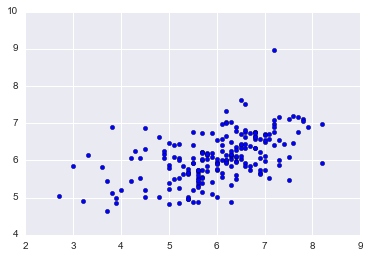

In [321]:
plt.scatter(y_test, y_pred)

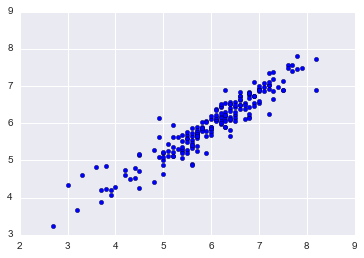

In [320]:
plt.scatter(y_test, y_predrf)

In [314]:
X8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 528
Data columns (total 13 columns):
imdbRating_orig       499 non-null float64
Year_orig             499 non-null int64
Award_count_orig      499 non-null int64
Noms_count_orig       499 non-null int64
Runtime_remake        499 non-null float64
Award_count_remake    499 non-null int64
Noms_count_remake     499 non-null int64
YearDiff              499 non-null int64
Drama_orig            499 non-null int64
Adventure_orig        499 non-null int64
Mystery_orig          499 non-null int64
Horror_orig           499 non-null int64
Romance_orig          499 non-null int64
dtypes: float64(2), int64(11)
memory usage: 54.6 KB


In [329]:
#Now try to log awards and remakes separately (last thing I swear!)
X13 = X8
X13['lnNoms_count_orig'] = np.log(1 + X13['Noms_count_orig'])
X13['lnNoms_count_remake'] = np.log(1 + X13['Noms_count_remake'])
X13['lnAward_count_orig'] = np.log(1 + X13['Award_count_orig'])
X13['lnAward_count_remake'] = np.log(1 + X13['Award_count_remake'])
X13 = X13.drop('Noms_count_orig', axis = 1)
X13 = X13.drop('Noms_count_remake', axis = 1)
X13 = X13.drop('Award_count_remake', axis = 1)
X13 = X13.drop('Award_count_orig', axis = 1)

# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
from sklearn import metrics

X13_train, X13_test, y_train, y_test = train_test_split(X13, y, test_size=0.4, random_state=42)

#Run X8 with sklearn:
lr = LinearRegression()

# Begin by fitting the model to the training data
lr.fit(X13_train, y_train)

# Now test it on the test set
y_pred = lr.predict(X13_test)

#And look at the r^2 for how it does on the test set
print metrics.r2_score(y_test, y_pred)

0.291946572861


In [330]:
#And fit this model
model = sm.OLS(y, sm.add_constant(X13))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      imdbRating_remake   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     26.48
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           1.31e-48
Time:                        17:10:32   Log-Likelihood:                -569.67
No. Observations:                 499   AIC:                             1167.
Df Residuals:                     485   BIC:                             1226.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                   33.2914      3.827      8.699      0.000        25.772    40.811
imdbRating_orig          0.3236      0.055      5.852      0.000         0.215     0.432
Year_orig               -0.0151      0.002     -7.995      0.000        -0.019    -0.011
Runtime_remake           0.0061      0.002      3.977      0.000         0.003     0.009
YearDiff                -0.0235      0.002     -9.936      0.000        -0.028    -0.019
Drama_orig               0.1978      0.076      2.605      0.009         0.049     0.347
Adventure_orig          -0.4820      0.127     -3.802      0.000        -0.731    -0.233
Mystery_orig            -0.2524      0.115     -2.197      0.029        -0.478    -0.027
Horror_orig             -0.2946      0.099     -2.982      0.003        -0.489    -0.101
Romance_orig            -0.2031      0.085     -2.403      0.017        -0.369    -0.037
lnNoms_count_orig       -0.1208      0.058     -2.086      0.038        -0.235    -0.007
lnNoms_count_remake      0.2845      0.053      5.367      0.000         0.180     0.389
lnAward_count_orig       0.0038      0.065      0.059      0.953        -0.124     0.132
lnAward_count_remake     0.1375      0.070      1.951      0.052        -0.001     0.276
==============================================================================
Omnibus:                       41.872   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.212
Skew:                          -0.574   Prob(JB):                     2.54e-15
Kurtosis:                       4.384   Cond. No.                     2.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [331]:
#Finally drop orig awards
X14 = X13.drop('lnAward_count_orig', axis = 1)

# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
from sklearn import metrics

X14_train, X14_test, y_train, y_test = train_test_split(X14, y, test_size=0.4, random_state=42)

#Run X8 with sklearn:
lr = LinearRegression()

# Begin by fitting the model to the training data
lr.fit(X14_train, y_train)

# Now test it on the test set
y_pred = lr.predict(X14_test)

#And look at the r^2 for how it does on the test set
print metrics.r2_score(y_test, y_pred)


0.291936520312


In [348]:
#BEST FINAL MODEL
X11 = X8.drop('Noms_count_orig', axis = 1)
X11 = X11.drop('Noms_count_remake', axis = 1)
X11 = X11.drop('Award_count_remake', axis = 1)
X11 = X11.drop('Award_count_orig', axis = 1)
X11['Noms+Awards_orig'] = Data1['Noms+Awards_orig']
X11['Noms+Awards_remake'] = Data1['Noms+Awards_remake']
X11['lnNoms+Awards_orig'] = np.log(1 + X11['Noms+Awards_orig'])
X11['lnNoms+Awards_remake'] = np.log(1 + X11['Noms+Awards_remake'])
X11 = X11.drop('Noms+Awards_orig', axis = 1)
X11 = X11.drop('Noms+Awards_remake', axis = 1)

#X11
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
from sklearn import metrics

X11_train, X11_test, y_train, y_test = train_test_split(X11, y, test_size=0.4, random_state=42)

#Run X11 with sklearn:
lr = LinearRegression()

# Begin by fitting the model to the training data
lr.fit(X11_train, y_train)

# Now test it on the test set
y_pred = lr.predict(X11_test)

#And look at the r^2 for how it does on the test set
print metrics.r2_score(y_test, y_pred)


0.292235485089


In [349]:
#So now run this best model, X11, on the whole set of Data
model = sm.OLS(y, sm.add_constant(X11))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      imdbRating_remake   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     30.83
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           2.65e-49
Time:                        22:11:04   Log-Likelihood:                -571.62
No. Observations:                 499   AIC:                             1167.
Df Residuals:                     487   BIC:                             1218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                   34.2664      3.838      8.928      0.000        26.725    41.808
imdbRating_orig          0.3331      0.054      6.190      0.000         0.227     0.439
Year_orig               -0.0157      0.002     -8.257      0.000        -0.019    -0.012
Runtime_remake           0.0064      0.002      4.133      0.000         0.003     0.009
YearDiff                -0.0240      0.002    -10.060      0.000        -0.029    -0.019
Drama_orig               0.2023      0.076      2.673      0.008         0.054     0.351
Adventure_orig          -0.4685      0.127     -3.690      0.000        -0.718    -0.219
Mystery_orig            -0.2547      0.115     -2.216      0.027        -0.480    -0.029
Horror_orig             -0.2838      0.099     -2.875      0.004        -0.478    -0.090
Romance_orig            -0.2162      0.084     -2.571      0.010        -0.381    -0.051
lnNoms+Awards_orig      -0.0876      0.040     -2.203      0.028        -0.166    -0.009
lnNoms+Awards_remake     0.3271      0.037      8.788      0.000         0.254     0.400
==============================================================================
Omnibus:                       41.387   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.810
Skew:                          -0.572   Prob(JB):                     5.12e-15
Kurtosis:                       4.363   Cond. No.                     2.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [350]:
#Now do same using sklearn
lr = LinearRegression()
# Begin by fitting the model to all the data
lr.fit(X11, y)
#Print out the R^2 for the model against the full dataset
lr.score(X11,y)

0.41052038205077235

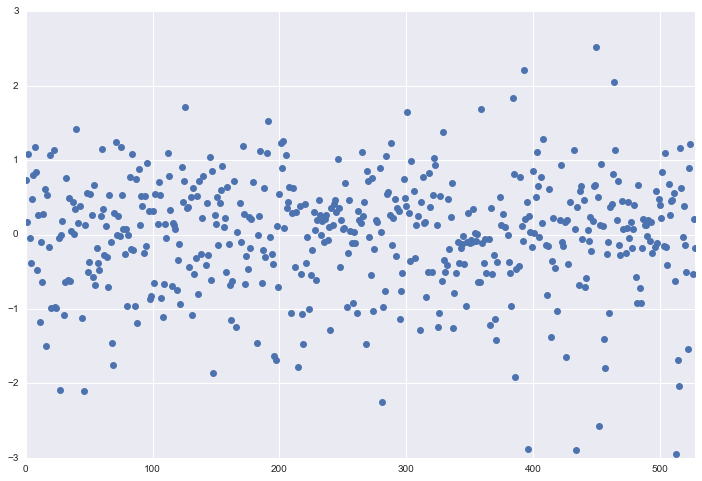

In [351]:
#Plot the residuals from this model
#We want them to be distributed randomly around 0 (smaller, closer to 0 indicates better model)
fit.resid.plot(style='o', figsize=(12,8))

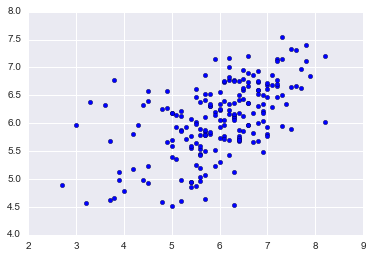

In [352]:
plt.scatter(y_test, y_pred)

In [365]:
#And now finally let's try a random forest on this last best X11 model (same features)

from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf = RandomForestRegressor()
rf.fit(X11_train, y_train)
rf.feature_importances_

y_predrf = rf.predict(X11_test)

print metrics.r2_score(y_test, y_predrf)

0.19905257214


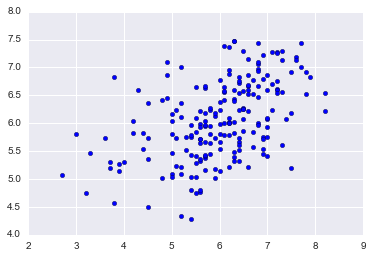

In [366]:
plt.scatter(y_test, y_predrf)

In [367]:
sorted(zip(rf.feature_importances_, X11.columns),reverse=True)

[(0.2328355033819777, 'Year_orig'),
 (0.23216688206812627, 'Runtime_remake'),
 (0.19358678644131627, 'imdbRating_orig'),
 (0.11669015039583944, 'YearDiff'),
 (0.093209036622594693, 'lnNoms+Awards_remake'),
 (0.048888046286155375, 'lnNoms+Awards_orig'),
 (0.028736577899344074, 'Horror_orig'),
 (0.02289538325320703, 'Drama_orig'),
 (0.012403842807717169, 'Mystery_orig'),
 (0.0093720841276144964, 'Romance_orig'),
 (0.0092157067161073823, 'Adventure_orig')]

In [375]:
#And finally the RF on the full set of data

rf = RandomForestRegressor()
rf.fit(X11, y)
rf.score(X11, y)

0.86558714949541993

In [376]:
rf.feature_importances_

array([ 0.19633514,  0.17914136,  0.21631085,  0.13718398,  0.01310647,
        0.01741406,  0.0134529 ,  0.03666959,  0.00865688,  0.05804789,
        0.12368088])

In [377]:
sorted(zip(rf.feature_importances_, X11.columns),reverse=True)

[(0.21631084850975957, 'Runtime_remake'),
 (0.1963351418647957, 'imdbRating_orig'),
 (0.17914136339776349, 'Year_orig'),
 (0.13718398189824657, 'YearDiff'),
 (0.12368087846029825, 'lnNoms+Awards_remake'),
 (0.058047893689700758, 'lnNoms+Awards_orig'),
 (0.03666958742337012, 'Horror_orig'),
 (0.017414057729397667, 'Adventure_orig'),
 (0.013452901529771435, 'Mystery_orig'),
 (0.013106468463655176, 'Drama_orig'),
 (0.0086568770332413197, 'Romance_orig')]